# Clustering
    Clustering is a form of un-supervised learning, meaning we do not have/or consider the labels of the data we analyze. We instead look at the structure of the data, find patterns or behaviuour.

### K-means
    - Randomly pick k centroids
    - Assign each point to the nearest centroid
    - Move the centroids to the center(mean) of the points assigned to it
    - Repeat 2 and 3 until centroid positions do not change (or until w/n cluster variation is minimized)

In [12]:
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

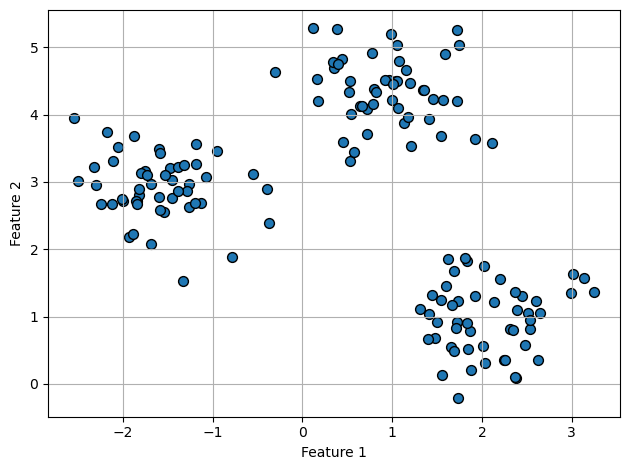

In [13]:
import matplotlib.pyplot as plt


plt.scatter(X[:, 0], X[:, 1], marker='o', edgecolor='black', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.grid()
plt.tight_layout()
#plt.savefig('figures/10_01.png', dpi=300)
plt.show()

In [14]:
from sklearn.cluster import KMeans


km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

In [4]:
def plot_kmeans3(y_km):
    plt.scatter(X[y_km == 0, 0],
                X[y_km == 0, 1],
                s=50, c='lightgreen',
                marker='s', edgecolor='black',
                label='Cluster 1')
    plt.scatter(X[y_km == 1, 0],
                X[y_km == 1, 1],
                s=50, c='orange',
                marker='o', edgecolor='black',
                label='Cluster 2')
    plt.scatter(X[y_km == 2, 0],
                X[y_km == 2, 1],
                s=50, c='lightblue',
                marker='v', edgecolor='black',
                label='Cluster 3')
    plt.scatter(km.cluster_centers_[:, 0],
                km.cluster_centers_[:, 1],
                s=250, marker='*',
                c='red', edgecolor='black',
                label='Centroids')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    plt.legend(scatterpoints=1)
    plt.grid()
    plt.tight_layout()
    #plt.savefig('figures/10_02.png', dpi=300)
    plt.show()

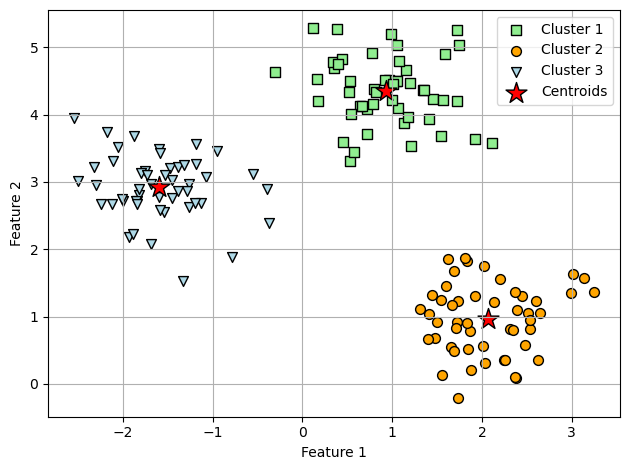

In [5]:
plot_kmeans3(y_km)

### K-means++

In [6]:
## Remove init parameter as it defualts to 'k-means++'

from sklearn.cluster import KMeans


km = KMeans(n_clusters=3,  
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

In [7]:
print(f'Distortion: {km.inertia_:.2f}')

Distortion: 72.48


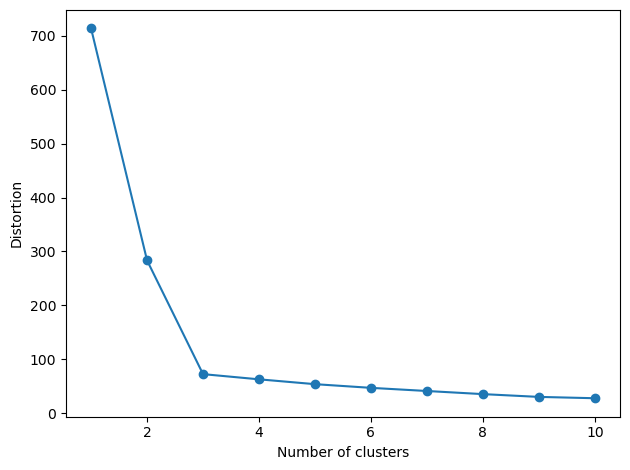

In [8]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

## DBSCAN

This method assignes cluster labels based on the density of points.

Label the following:
- A point is a core point if at least a specified # MinPts (neighboring points) fall w/n a specified radius epsilon.
- A border point has fewer neighbors than MinPts within epsilon but lies w/n the radius.
- All other pts not in the above are noise.

After labeling the above:
1. Form a cluster for each core point.
2. Assign each border point to the cluster of its core point.

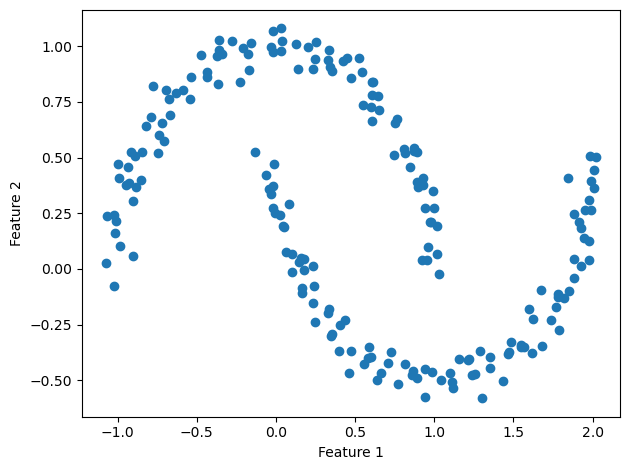

In [9]:
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()

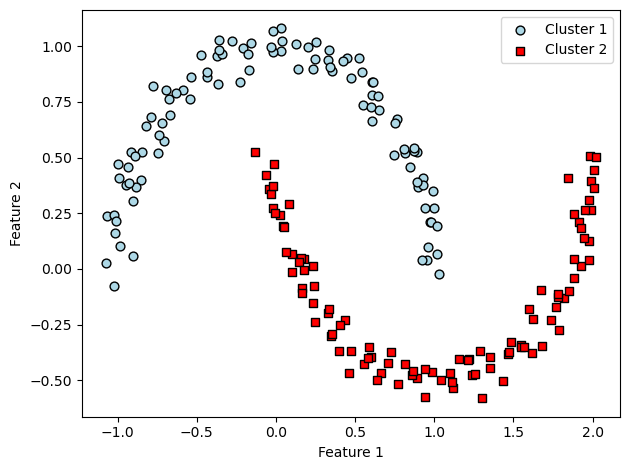

In [10]:
from sklearn.cluster import DBSCAN


db = DBSCAN(eps=.25, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='Cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='Cluster 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.legend()
plt.tight_layout()

In [11]:
# from sklearn.neighbors import NearestNeighbors
# import numpy as np

# neigh = NearestNeighbors(n_neighbors=15)
# nbrs = neigh.fit(X)
# distances, indices = nbrs.kneighbors(X)

# distances = np.sort(distances, axis=0)
# distances = distances[:,1]
# plt.plot(distances)